In [3]:

# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [4]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('cancun.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [5]:

# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,22/01/2019,22:00,129.0,119.0,15.51,34.4,24.0,93.0,1016.2,1.0,62.5
1,22/01/2019,23:00,141.0,147.0,18.12,35.0,24.2,86.0,1016.2,0.3,7.0
2,23/01/2019,00:00,141.0,125.0,19.95,39.0,24.8,81.0,1016.4,0.0,0.0
3,23/01/2019,01:00,134.0,156.0,19.29,40.8,25.0,79.0,1016.8,0.0,0.0
4,23/01/2019,02:00,143.0,157.0,22.24,41.9,25.3,76.0,1017.0,0.0,0.0


In [6]:

# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [7]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [8]:

# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [9]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,129.0,119.0,15.51,34.4,24.0,93.0,1016.2,1.0,62.5,2019-01-22 22:00:00
1,141.0,147.0,18.12,35.0,24.2,86.0,1016.2,0.3,7.0,2019-01-22 23:00:00
2,141.0,125.0,19.95,39.0,24.8,81.0,1016.4,0.0,0.0,2019-01-23 00:00:00
3,134.0,156.0,19.29,40.8,25.0,79.0,1016.8,0.0,0.0,2019-01-23 01:00:00
4,143.0,157.0,22.24,41.9,25.3,76.0,1017.0,0.0,0.0,2019-01-23 02:00:00


In [10]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,138.000000
mean,164.604317,165.920863,11.456835,22.905755,22.956835,87.949640,1014.661871,2.166187,120.388406
std,116.263483,115.591426,4.634042,9.801706,3.531392,13.340754,1.717700,18.847883,203.122739
min,1.000000,0.000000,2.070000,7.900000,13.800000,51.000000,1006.300000,0.000000,0.000000
25%,69.000000,77.000000,8.210000,15.150000,21.200000,78.000000,1013.750000,0.000000,0.000000
50%,136.000000,148.000000,10.380000,21.200000,23.200000,92.000000,1014.700000,0.000000,0.000000
75%,299.000000,294.500000,14.050000,28.700000,25.350000,100.000000,1015.700000,0.000000,161.550000
max,358.000000,359.000000,23.800000,66.100000,29.900000,100.000000,1018.500000,221.000000,836.200000


In [11]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
1,141.0,147.0,18.12,35.0,24.2,86.0,1016.2,0.3,7.0,2019-01-22 23:00:00
2,141.0,125.0,19.95,39.0,24.8,81.0,1016.4,0.0,0.0,2019-01-23 00:00:00
16,160.0,153.0,17.71,36.7,24.5,99.0,1015.4,0.0,90.8,2019-01-23 14:00:00
34,231.0,202.0,6.09,16.6,24.7,89.0,1012.9,0.0,0.0,2019-01-24 08:00:00
48,285.0,295.0,6.38,20.0,24.2,91.0,1013.6,14.2,22.7,2019-01-24 22:00:00
64,8.0,8.0,9.70,18.9,24.2,100.0,1017.6,0.0,238.7,2019-01-25 14:00:00
139,22.0,7.0,13.02,24.6,24.5,60.0,1016.0,0.0,445.0,2019-01-28 17:00:00
161,119.0,122.0,10.04,21.2,24.8,77.0,1016.3,0.0,334.3,2019-01-29 15:00:00


In [12]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       164.604317
DIRR       165.920863
VELS        11.456835
VELR        22.905755
TEMP        22.956835
HR          87.949640
PB        1014.661871
PREC         2.166187
RADSOL     120.388406
dtype: float64

In [13]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

22.9568345323741

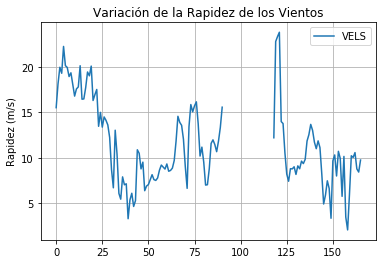

In [14]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

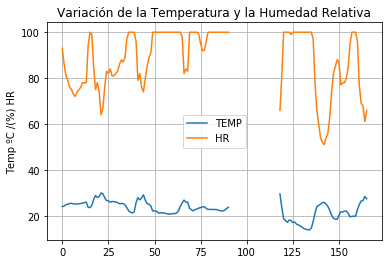

In [15]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

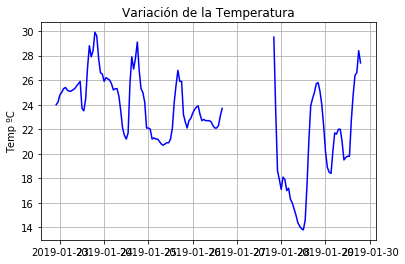

In [16]:

plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [17]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

In [18]:
import plotly
plotly.__version__

'3.2.1'

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=df.FECHA,
    y=df.VELS,
    name='Rapidez de los vientos',
   
)
trace2 = go.Scatter(
    x=df.FECHA,
    y=df.VELR,
    name = 'Rapidez de las ráfagas ',
)

data = [trace1, trace2]

fig = dict(data=data)
py.iplot(fig, filename='simple-connectgaps')

In [20]:
df['VELS2']=10*(df.VELS)

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=df.FECHA,
    y=df.DIRS,
    name='Dirección',
   
)
trace2 = go.Scatter(
    x=df.FECHA,
    y=df.VELS2,
    name = 'Intensidad ',
)

data = [trace1, trace2]

fig = dict(data=data)
py.iplot(fig, filename='simple-connectgaps')

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x=df.FECHA,
    y=df.RADSOL,
    name='Radiación Solar',
   
)

data = [trace]
fig = dict(data=data)
py.iplot(fig, filename='simple-connectgaps')

In [23]:
df.TEMP.min()

13.8

In [25]:
df.TEMP.max()

29.9

In [27]:
df.TEMP.max() - df.TEMP.min()

16.099999999999998

In [28]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,VELS2
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,138.000000,139.000000
mean,164.604317,165.920863,11.456835,22.905755,22.956835,87.949640,1014.661871,2.166187,120.388406,114.568345
std,116.263483,115.591426,4.634042,9.801706,3.531392,13.340754,1.717700,18.847883,203.122739,46.340418
min,1.000000,0.000000,2.070000,7.900000,13.800000,51.000000,1006.300000,0.000000,0.000000,20.700000
25%,69.000000,77.000000,8.210000,15.150000,21.200000,78.000000,1013.750000,0.000000,0.000000,82.100000
50%,136.000000,148.000000,10.380000,21.200000,23.200000,92.000000,1014.700000,0.000000,0.000000,103.800000
75%,299.000000,294.500000,14.050000,28.700000,25.350000,100.000000,1015.700000,0.000000,161.550000,140.500000
max,358.000000,359.000000,23.800000,66.100000,29.900000,100.000000,1018.500000,221.000000,836.200000,238.000000
